Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Inladen van modules en df:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('US_Accidents_June20.csv')







Algemene explorative data

In [3]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

df schoonmaken 

In [2]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

specifieke slechte data aantekeningen

In [4]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

In [ ]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

Data op landelijke schaal (Bart)

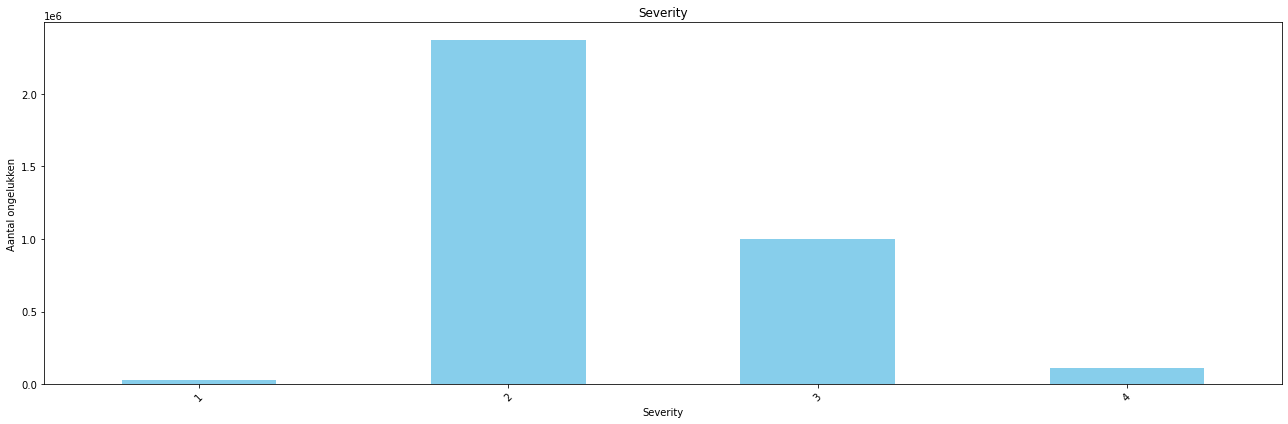

In [43]:
state_accident_counts = df['Severity'].value_counts()
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

In [ ]:
# Boxplot van 'Severity' vs. 'Temperature(F)'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title('Boxplot van Severity vs. Temperature(F)')
plt.xlabel('Severity')
plt.ylabel('Temperature(F)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sunrise_Sunset', y='Severity', data=df)
plt.title('Paired Boxplots van Sunrise_Sunset en Severity')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Severity')
plt.show()

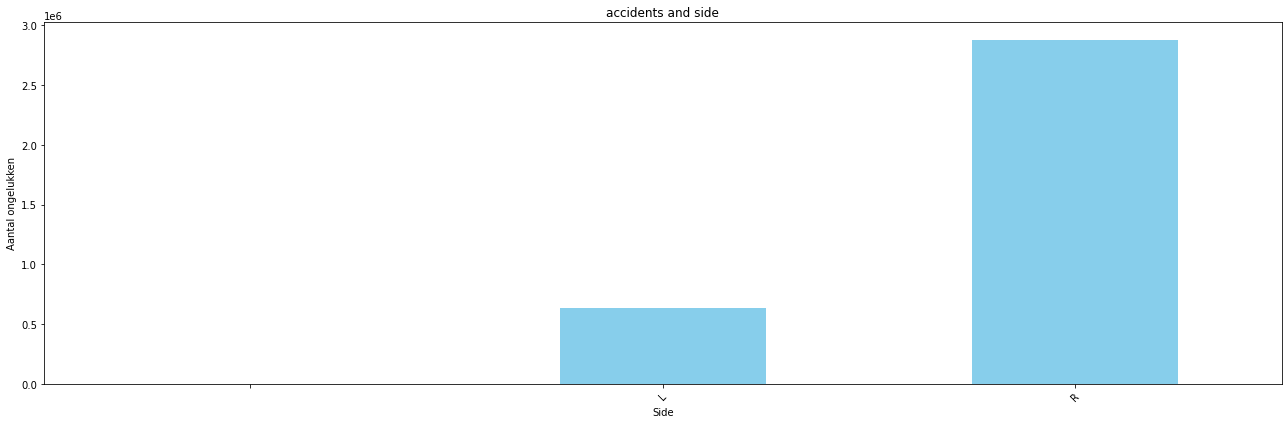

In [61]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Data op individuele staten (Quint & Doena)

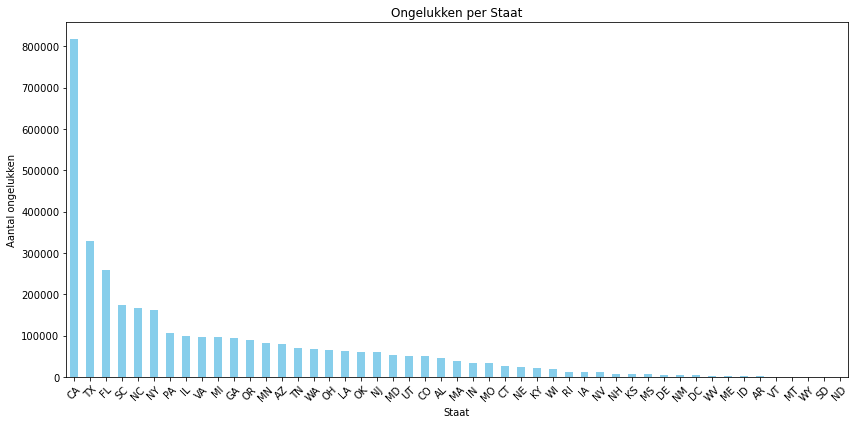

In [5]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



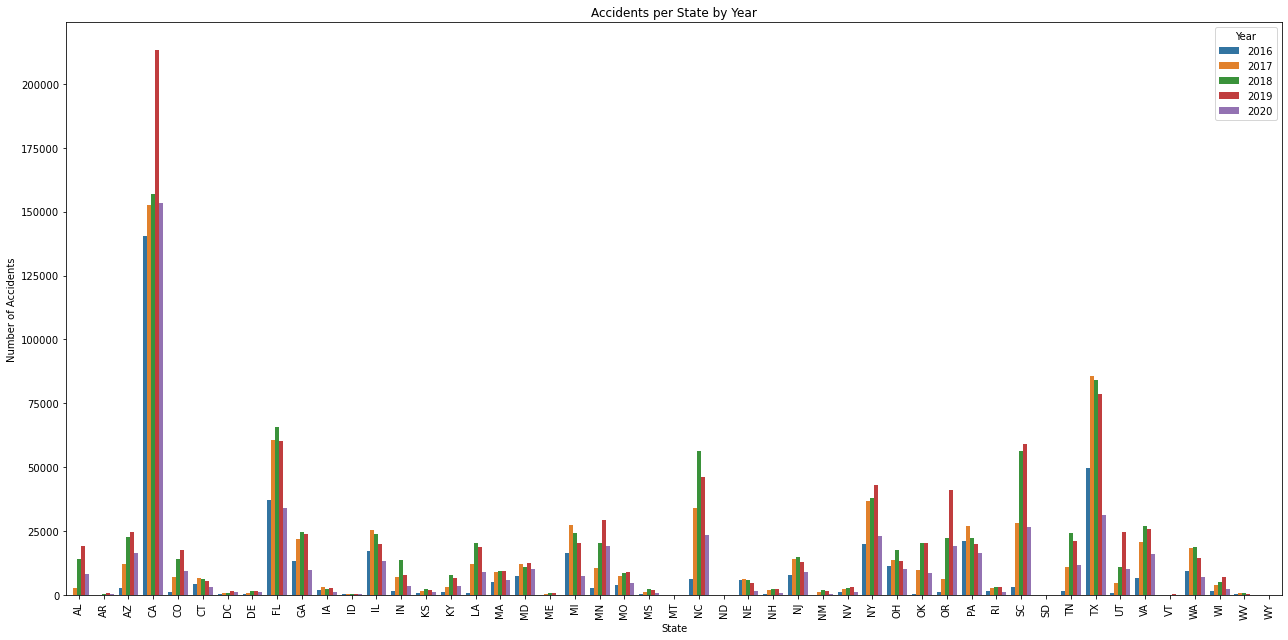

In [6]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

Isabel:

Where you live plays a key role in the average cost of car insurance. For instance, drivers in rural areas generally pay less than drivers in urban areas because there tends to be fewer cars on the road and fewer accidents. Motorists in neighborhoods prone to theft and vandalism or severe weather usually pay more than those in areas where crime and severe weather is less frequent.

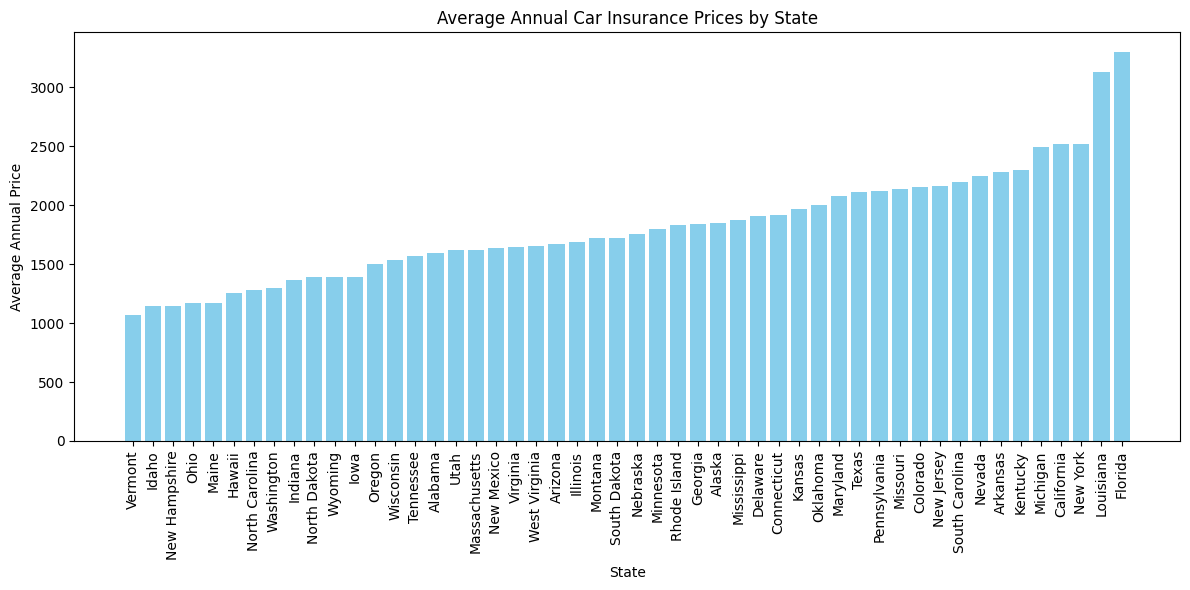

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('data-WUV8m.csv')

# Sort the DataFrame by the "Average Annual Price" column in ascending order
df_sorted = df.sort_values(by='Average annual full coverage cost')

# Create a bar chart to visualize the states from least expensive to most expensive
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['State'], df_sorted['Average annual full coverage cost'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Annual Price')
plt.title('Average Annual Car Insurance Prices by State')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()




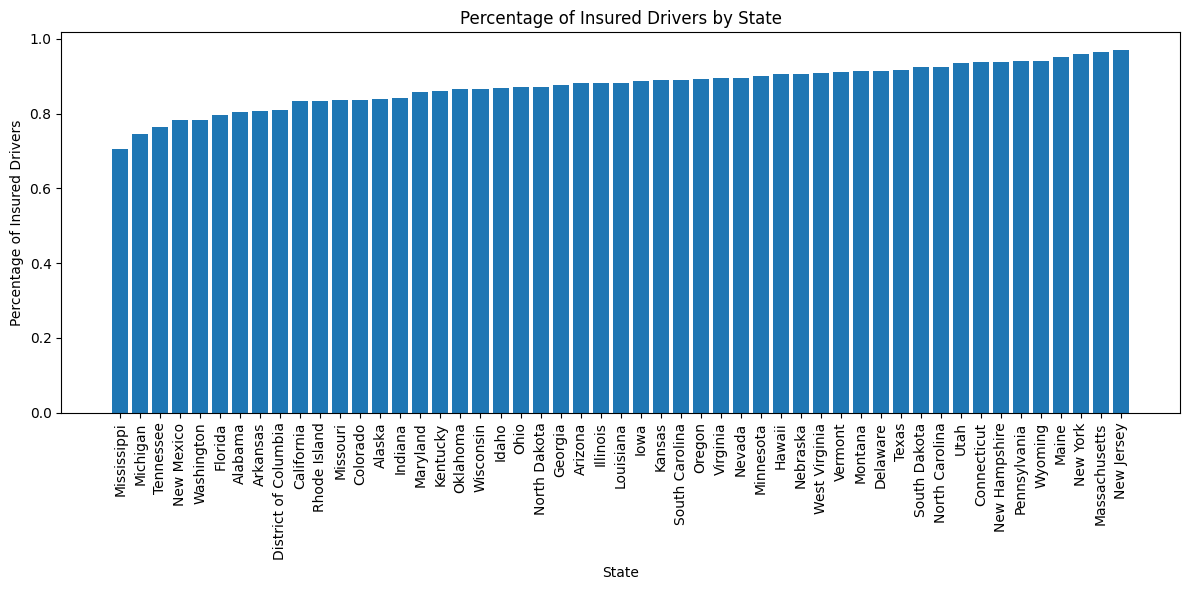

In [5]:
df = pd.read_excel('Data_(on)verzekered.xlsx')

plt.figure(figsize=(12, 6))
plt.bar(df['State'], df['insured'])
plt.xlabel('State')
plt.ylabel('Percentage of Insured Drivers')
plt.title('Percentage of Insured Drivers by State')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

Least expensive states for full coverage auto insurance
Vermont: $1,066
Idaho: $1,143
New Hampshire: $1,149
Maine: $1,168
Ohio: $1,168
Most expensive states for full coverage auto insurance
Florida: $3,301
Louisiana: $3,128
New York: $2,523
California: $2,521
Michigan: $2,495

Sophia met weer enzo:

In [ ]:
#leuker coderen